In [1]:
pip install pandas numpy matplotlib scikit-learn xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c4/41/f0980f72531ab8e1fdbeb2643c32f6bcc7e8777fa49e362f94d728887a58/xgboost-2.1.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.datasets import fetch_california_housing


In [3]:
# Load the California housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Check for missing values
print(df.isnull().sum())


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [4]:
# Split the data into training and testing sets
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [5]:
# Define the model
xgb_model = xgb.XGBRegressor()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.2],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}


In [6]:
# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 0.30118743908821377
RMSE: 0.45752959355846323
R-squared: 0.8425845226756274


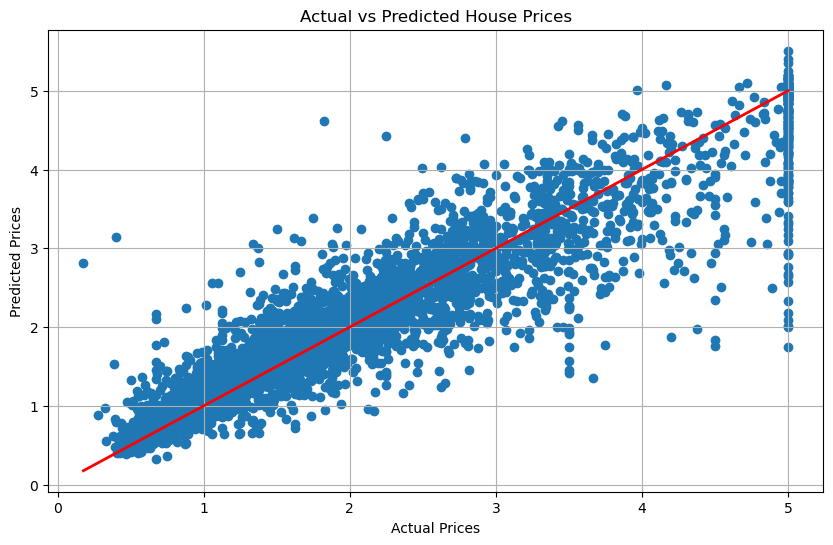

In [7]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid()
plt.show()
